# Group Project

In [18]:
import pandas as pd
import numpy as np
import os
import glob
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn
import sklearn
seaborn.set()
# numpy pandas shapely geopandas rasterio
cwd_path = os.getcwd()
usa_quake_path = cwd_path + "\\earthquake_contiguous_usa_12batch\\"
eu_quake_path = cwd_path + "\\Earthquake_2016_2018_all_eu\\"

# Assignment understanding
Note for reading the data.
Each csv is organized into two month intervals. 
It goes as follows

2020: sep - oct, nov - dec

2021: jan - feb, march - april, may - june, july - august, sep - oct, nov - dec

2022: jan - feb, march - april, may - june, july - august,

We are asked to split these 12 batches into '3 wide windows' 012, 123, 234, 345, and so on.

In [76]:
# Used to enumerate the files in each directory.
# Useful for finding a sepcific file's index for the us_df[] and eu_df[] arrays/list

for x, us in enumerate(glob.glob(usa_quake_path+"*.csv")):
    print("%2i %s" % (x,os.path.basename(us)))
print()
for x, eu in enumerate(glob.glob(eu_quake_path+"*.csv")):
    print("%2i %s" % (x,os.path.basename(eu)))

 0 Earthquake_2020_11_2020_12_filtered.csv
 1 Earthquake_2020_9_2020_10_filtered.csv
 2 Earthquake_2021_11_2021_12_filtered.csv
 3 Earthquake_2021_1_2021_2_filtered.csv
 4 Earthquake_2021_3_2021_4_filtered.csv
 5 Earthquake_2021_5_2021_6_filtered.csv
 6 Earthquake_2021_7_2021_8_filtered.csv
 7 Earthquake_2021_9_2021_10_filtered.csv
 8 Earthquake_2022_1_2022_2_filtered.csv
 9 Earthquake_2022_3_2022_4_filtered.csv
10 Earthquake_2022_5_2022_6_filtered.csv
11 Earthquake_2022_7_2022_8_filtered.csv

 0 Earthquake_2016_10_filtered_eu.csv
 1 Earthquake_2016_11_filtered_eu.csv
 2 Earthquake_2016_12_filtered_eu.csv
 3 Earthquake_2016_1_filtered_eu.csv
 4 Earthquake_2016_2_filtered_eu.csv
 5 Earthquake_2016_3_filtered_eu.csv
 6 Earthquake_2016_4_filtered_eu.csv
 7 Earthquake_2016_5_filtered_eu.csv
 8 Earthquake_2016_6_filtered_eu.csv
 9 Earthquake_2016_7_filtered_eu.csv
10 Earthquake_2016_8_filtered_eu.csv
11 Earthquake_2016_9_filtered_eu.csv
12 Earthquake_2017_10_filtered_eu.csv
13 Earthquake_20

In [36]:
# CSVs are appended to an array/list as DataFames.
# Done for both US and EU data
us_df = []
eu_df = []
for us in glob.glob(usa_quake_path+"*.csv"):
    us_df.append(pd.read_csv(us))
    
for eu in glob.glob(eu_quake_path+"*.csv"):
    eu_df.append(pd.read_csv(eu))

time   latitude   longitude  depth   mag  \
11   2020-11-03T17:41:19.160Z  39.367000 -123.244833   7.00  3.34   
12   2020-11-03T19:58:24.353Z  43.811800 -105.327100   0.00  3.40   
13   2020-11-03T23:18:50.124Z  44.367500 -115.137200  10.00  3.20   
14   2020-11-04T00:20:24.770Z  37.639167 -119.389833  11.81  3.40   
19   2020-11-04T20:26:40.692Z  43.640900 -105.395100   0.00  3.20   
..                        ...        ...         ...    ...   ...   
579  2020-12-31T16:22:41.462Z  44.089500 -114.946000  13.83  3.20   
580  2020-12-31T16:22:47.005Z  43.962000 -114.997100  16.66  3.40   
581  2020-12-31T18:21:33.419Z  32.296300 -101.800300   5.82  3.30   
582  2020-12-31T19:12:33.783Z  32.290900 -101.793200   7.98  3.60   
583  2020-12-31T20:44:20.034Z  32.295100 -101.794100   5.00  4.00   

                        geometry  
11   POINT (-123.24483 39.36700)  
12   POINT (-105.32710 43.81180)  
13   POINT (-115.13720 44.36750)  
14   POINT (-119.38983 37.63917)  
19   POINT (-105.39510 43.64090)  
..                           ...  
579  POINT (-114.94600 44.08950)  
580  POINT (-114.99710 43.96200)  
581  POINT (-101.80030 32.29630)  
582  POINT (-101.79320 32.29090)  
583  POINT (-101.79410 32.29510)  

[169 rows x 6 columns]

# TA demo code
Here, I followed the TA demo an yoinked most of the code so we can see how it works.

<AxesSubplot:>

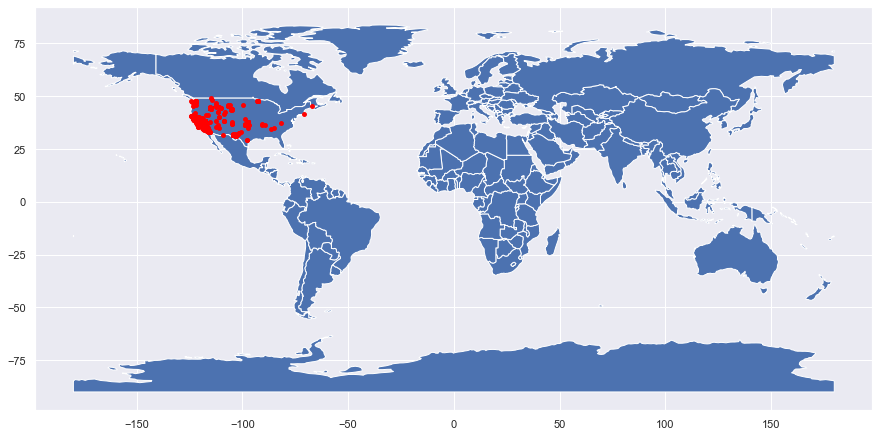

In [37]:
from shapely.geometry import Point
plt.rcParams["figure.figsize"] = [13.00, 7]

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

points= [Point(xy) for xy in zip(us_df[0].longitude, us_df[0].latitude)]
allPoints = gpd.GeoDataFrame(us_df[0], geometry=points)

allPoints.plot(ax=world.plot(figsize=(15,8)), marker='o', color='red', markersize=15)

#geo_all = [Point(xy) for xy in zip(df_plot_all.longitude, df_plot_all.latitude)]


C:\Users\antho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


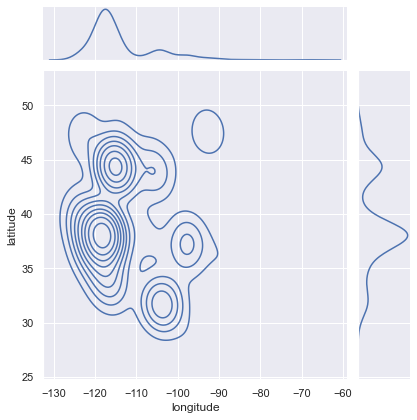

In [52]:
long_lat = us_df[0][['latitude','longitude']]
seaborn.jointplot("longitude","latitude",long_lat, kind="kde")

C:\Users\antho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


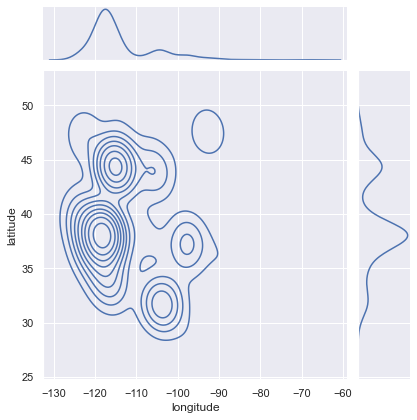

In [53]:
df_large = us_df[0][us_df[0]['mag'] >= 2.25]
df_large = df_large[['latitude','longitude']]
seaborn.jointplot("longitude","latitude",df_large, kind="kde")

In [62]:
xgrid100 = np.sort(list(df_large['longitude']))
ygrid100 = np.sort(list(df_large['latitude']))
x100, y100 = np.meshgrid(xgrid100, ygrid100)

print("X grid: \n",x100)
print("X grid: \n",y100)

X grid: 
 [[-124.38033333 -124.2291667  -124.1733333  ...  -81.8298333
   -70.9546      -67.1595    ]
 [-124.38033333 -124.2291667  -124.1733333  ...  -81.8298333
   -70.9546      -67.1595    ]
 [-124.38033333 -124.2291667  -124.1733333  ...  -81.8298333
   -70.9546      -67.1595    ]
 ...
 [-124.38033333 -124.2291667  -124.1733333  ...  -81.8298333
   -70.9546      -67.1595    ]
 [-124.38033333 -124.2291667  -124.1733333  ...  -81.8298333
   -70.9546      -67.1595    ]
 [-124.38033333 -124.2291667  -124.1733333  ...  -81.8298333
   -70.9546      -67.1595    ]]
X grid: 
 [[29.0969     29.0969     29.0969     ... 29.0969     29.0969
  29.0969    ]
 [29.1134     29.1134     29.1134     ... 29.1134     29.1134
  29.1134    ]
 [31.0982     31.0982     31.0982     ... 31.0982     31.0982
  31.0982    ]
 ...
 [47.84766667 47.84766667 47.84766667 ... 47.84766667 47.84766667
  47.84766667]
 [48.3456     48.3456     48.3456     ... 48.3456     48.3456
  48.3456    ]
 [48.8828     48.8828     48

In [65]:
xy100 = np.vstack([y100.ravel(),x100.ravel()]).T

In [69]:
from sklearn import neighbors
kde100 = sklearn.neighbors.KernelDensity(
bandwidth = 1,
metric = 'minkowski',
kernel = 'gaussian',
algorithm = 'ball_tree')
kde100.fit(df_large.values)

KernelDensity(algorithm='ball_tree', bandwidth=1, metric='minkowski')

In [71]:
log_density = kde100.score_samples(xy100)
density = np.exp(log_density)
density = density.reshape(x100.shape)
print(density.shape)

(585, 585)


In [75]:
fig1 = plt.figure(figsize=(15,15))

the_map = mpl_toolkits.basemap.Basemap(
    projection = 'cyl',
    llcrnrlat=y100.min()-5, urcrnrlat=y100.max()+5,
    llcrnrlot=x100.min()-5, urcrnrlot=x100.max()+5,
    resolution='c')

NameError: name 'mpl_toolkits' is not defined

<Figure size 1080x1080 with 0 Axes>